In [2]:
%run "Properati_base_setup.py"

Running command `conda list`... ok
pandas=1.0.3 already installed
matplotlib=2.2.2 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
plotly=4.6.0 already installed
chart-studio=1.1.0 already installed
nodejs=13.13.0 already installed
psutil=5.7.0 already installed
plotly-orca=1.3.1 already installed


In [4]:
import pandas as pd
import seaborn as sns
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
#import unidecode as ud

In [5]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 5000)

In [6]:
import chardet
def get_encoding_type(csv_path):
    rawdata = open(csv_path, 'rb').read()
    result = chardet.detect(rawdata)
    return result.get('encoding')

In [7]:
data = pd.read_csv("properati.csv", encoding="iso-8859-1")

In [8]:
#Creo una copia del DF
data_clean = data.copy(deep=True)

In [9]:
#Columnas que son string
columnas_str = ['operation', 'property_type', 'place_name', 'place_with_parent_names', 'country_name', 'state_name', 'description', 'title']

In [10]:
#Le quito los espacios en blanco
for columna in columnas_str:
    data_clean[columna] = data_clean[columna].str.strip()

<span style="font-size:24px">OPERACION<span>

In [11]:
#BUSCAR NULOS
data_clean["property_type"].isnull().sum()

0

In [250]:
#Expresión regular para buscar venta o alquiler
regex = re.compile("(venta)|(alquiler)", flags = re.IGNORECASE)

In [252]:
#Buscar Venta o Alquiler en description
regexOperacionesDescription = data_clean.description.apply(lambda x: regex.search(str(x)))
dfVentasDescription = regexOperacionesDescription.apply(lambda x: np.NaN if x is None else x.group(0))

#Normalizar
dfVentasDescription[dfVentasDescription.notnull()].unique()
dfVentasDescription.replace(["VENTA", "venta"], "Venta", inplace=True)
dfVentasDescription.replace(["alquiler", "ALQUILER"], "Alquiler", inplace=True)
dfVentasDescription[dfVentasDescription.notnull()].unique()

#Crear columna Operacion
data_clean["Operacion_Description"] = dfVentasDescription
data_clean["Operacion_Description"].value_counts()

Venta       42336
Alquiler     1325
Name: Operacion_Description, dtype: int64

In [253]:
#Buscar Venta o Alquiler en title
regexOperacionesTitle = data_clean.title.apply(lambda x: regex.search(str(x)))
dfVentasTitle = regexOperacionesTitle.apply(lambda x: np.NaN if x is None else x.group(0))

#Normalizar
dfVentasTitle[dfVentasTitle.notnull()].unique()
dfVentasTitle.replace(["VENTA", "venta"], "Venta", inplace=True)
dfVentasTitle.replace(["alquiler", "ALQUILER"], "Alquiler", inplace=True)
dfVentasTitle[dfVentasTitle.notnull()].unique()

#Crear columna Title
data_clean["Operacion_Title"] = dfVentasTitle
data_clean["Operacion_Title"].value_counts()

Venta       36125
Alquiler      217
Name: Operacion_Title, dtype: int64

In [254]:
#Buscar Venta o Alquiler en properati_url
regexOperacionesURL = data_clean.properati_url.apply(lambda x: regex.search(str(x)))
dfVentasURL = regexOperacionesURL.apply(lambda x: np.NaN if x is None else x.group(0))

#Normalizar
dfVentasURL[dfVentasURL.notnull()].unique()
dfVentasURL.replace(["VENTA", "venta"], "Venta", inplace=True)
dfVentasURL.replace(["alquiler", "ALQUILER"], "Alquiler", inplace=True)
dfVentasURL[dfVentasURL.notnull()].unique()

#Crear columna URL
data_clean["Operacion_URL"] = dfVentasURL
data_clean["Operacion_URL"].value_counts()

Venta       121086
Alquiler       134
Name: Operacion_URL, dtype: int64

In [257]:
#Crear la columna Operacion con Operacion_URL que contempla todos los casos
data_clean["Operacion"] = data_clean["Operacion_URL"]

In [296]:
#Precios mínimos y máximos para Ventas
dfPriceAproxUSDNotNull = data_clean[data_clean.price_aprox_usd.notnull()]
dfPriceAproxUSDMayor0 = dfPriceAproxUSDNotNull[dfPriceAproxUSDNotNull.price_aprox_usd > 0]
dfVenta = dfPriceAproxUSDMayor0[dfPriceAproxUSDMayor0.Operacion == "Venta"]
dfVenta.filter(items=["property_type", "price_aprox_usd"]).groupby(by="property_type").agg(['min', 'max'])

price_aprox_usd            
                          min         max
property_type                            
PH                    5047.53   2800000.0
apartment             4666.62  46545445.0
house                 5047.53  25000000.0
store                 4952.45  13000000.0

In [297]:
#Precios mínimos y máximos para alquiler
dfAlquiler = dfPriceAproxUSDMayor0[dfPriceAproxUSDMayor0.Operacion == "Alquiler"]
dfAlquiler.filter(items=["property_type", "price_aprox_usd"]).groupby(by="property_type").agg(['min', 'max'])

price_aprox_usd           
                          min        max
property_type                           
PH                   40000.00   210000.0
apartment            40000.00  1800000.0
house                36454.38  1900000.0
store                42000.00  1700000.0

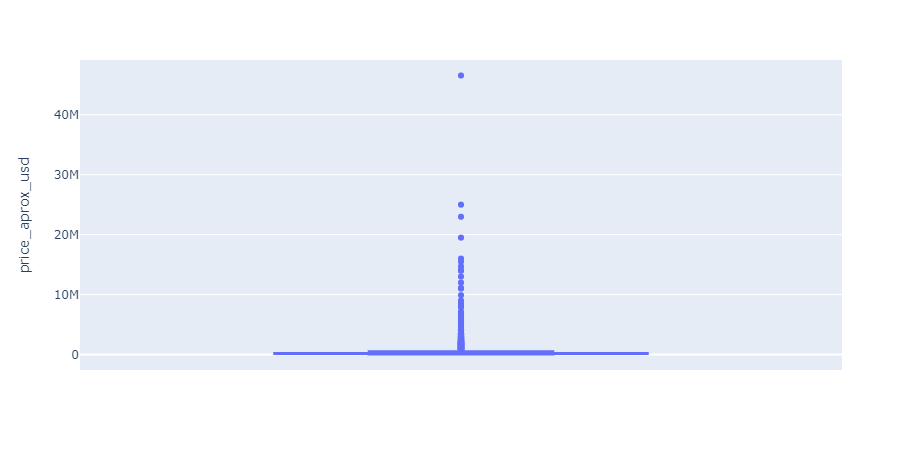

In [299]:
fig = px.box(dfVenta, y="price_aprox_usd")
fig.show()

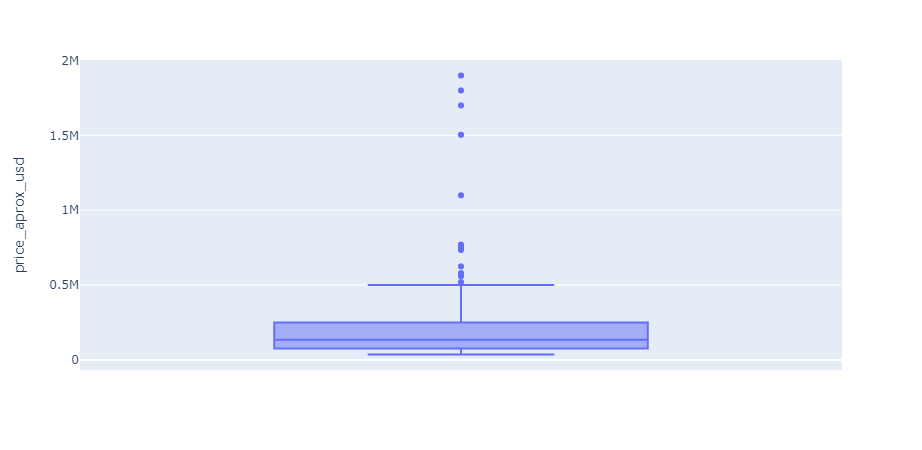

In [300]:
fig = px.box(dfAlquiler, y="price_aprox_usd")
fig.show()